# Exploratory Data Analysis

## Global

在Global里面导packages和define一些常用的variable

然后在各自的section里面尝试EDA

这样可以统一命名，希望不会有merge conflict

另外, [nbdime](https://nbdime.readthedocs.io/en/latest/index.html)看起来像是一个可以帮助解决merge conflict的东西，可以试一试

General [merge conflict solution](http://allendowney.github.io/amgit/conflict.html)

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
!ls dataSets/training

links (table 3).csv                volume(table 6)_training.csv
routes (table 4).csv               weather (table 7)_training.csv
trajectories(table 5)_training.csv


In [3]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
routes = pd.read_csv(training_path1+'routes (table 4).csv')
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')

## Muci's Section

In [4]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
print(links.shape)
print(links.info())
links.head()

(24, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
link_id       24 non-null int64
length        24 non-null int64
width         24 non-null int64
lanes         24 non-null int64
in_top        21 non-null object
out_top       21 non-null object
lane_width    24 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.4+ KB
None


,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [5]:
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
print(volume.shape)
print(volume.info())
volume.head()

(543699, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543699 entries, 0 to 543698
Data columns (total 6 columns):
time             543699 non-null object
tollgate_id      543699 non-null int64
direction        543699 non-null int64
vehicle_model    543699 non-null int64
has_etc          543699 non-null int64
vehicle_type     212710 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 24.9+ MB
None


,time,tollgate_id,direction,vehicle_model,has_etc,vehicle_type
0,2016-09-19 23:09:25,2,0,1,0,NaN
1,2016-09-19 23:11:53,2,0,1,0,NaN
2,2016-09-19 23:13:54,2,0,1,0,NaN
3,2016-09-19 23:17:48,1,0,1,1,NaN
4,2016-09-19 23:16:07,2,0,1,0,NaN


In [6]:
routes = pd.read_csv(training_path1+'routes (table 4).csv')
print(routes.shape)
print(routes.info())
routes.head()

(6, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
intersection_id    6 non-null object
tollgate_id        6 non-null int64
link_seq           6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,intersection_id,tollgate_id,link_seq
0,A,2,"110,123,107,108,120,117"
1,A,3,"110,123,107,108,119,114,118,122"
2,B,1,"105,100,111,103,116,101,121,106,113"
3,B,3,"105,100,111,103,122"
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113"


In [7]:
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
print(weather.shape)
print(weather.info())
weather.head()

(782, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
date              782 non-null object
hour              782 non-null int64
pressure          782 non-null float64
sea_pressure      782 non-null float64
wind_direction    782 non-null float64
wind_speed        782 non-null float64
temperature       782 non-null float64
rel_humidity      782 non-null float64
precipitation     782 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB
None


,date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,2016-07-01,0,1000.4,1005.3,225.0,2.1,26.4,94.0,0.0
1,2016-07-01,3,1000.5,1005.3,187.0,2.7,29.0,76.0,0.0
2,2016-07-01,6,998.9,1003.7,212.0,2.9,31.7,67.0,0.0
3,2016-07-01,9,998.7,1003.5,244.0,2.7,31.6,59.0,0.0
4,2016-07-01,12,999.7,1004.5,222.0,1.3,29.9,68.0,0.0


In [8]:
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')
print(trajectories.shape)
print(trajectories.info())
trajectories.head()

(109244, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109244 entries, 0 to 109243
Data columns (total 6 columns):
intersection_id    109244 non-null object
tollgate_id        109244 non-null int64
vehicle_id         109244 non-null int64
starting_time      109244 non-null object
travel_seq         109244 non-null object
travel_time        109244 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.0+ MB
None


,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


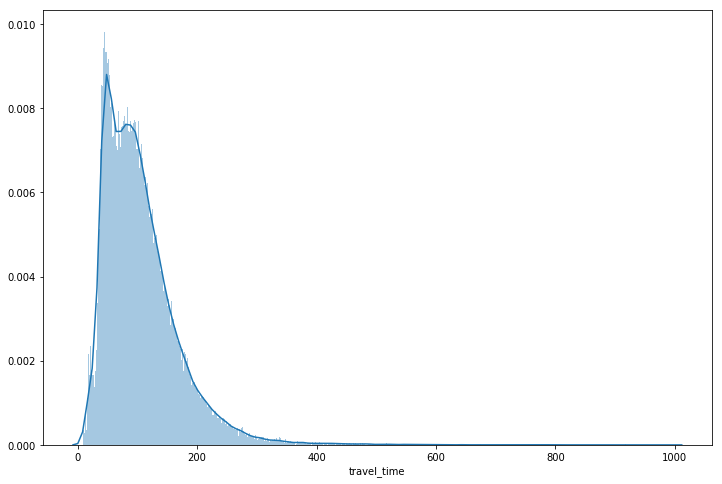

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.distplot(trajectories["travel_time"][trajectories.travel_time < 1000], bins = 1000)

In [10]:
trajectories.isnull().sum()

intersection_id    0
tollgate_id        0
vehicle_id         0
starting_time      0
travel_seq         0
travel_time        0
dtype: int64

In [11]:
trajectories.shape

(109244, 6)

In [12]:
type(trajectories["starting_time"][2])

str

In [13]:
travel_seq = trajectories.travel_seq

In [14]:
len(travel_seq)

109244

In [15]:
type(range(109244))

range

- start time: 2016-07-19 00:14:24
- end time: 2016-10-17 23:56:52
- 131,022 minutes (rounded down)
- 26205 time slot

In [17]:
def get_info(seq):
    new_seq = [[x.split('#')[0], x.split('#')[1], x.split('#')[2]] for x in seq]
    return new_seq

info = []
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i]. split(';')
    info_item = get_info(seq)
    info.append(info_item)

In [18]:
def get_info_tup(x):
    link_id, start_time, duration = x.split('#')[0], x.split('#')[1], x.split('#')[2]
    return link_id, start_time, duration 

In [19]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 14, 24), datetime(2016, 10, 17, 23, 56, 52), 
       timedelta(minutes=5))]

In [20]:
header = links.link_id
index = dts
LT_df = pd.DataFrame(columns = header, index = index)
LT_df = LT_df.fillna(0)
LT_df.index.name = 'time_slot'

In [21]:
import time
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_interval_minutes = 5
dts = [dt for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 10, 0), datetime(2016, 10, 18, 0, 0, 0), 
       timedelta(minutes=time_interval_minutes))]

start_time_sys = time.clock()

start = dts[0]
LT_matrix = [[0]*len(LT_df.columns) for _ in range(len(dts))]

for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    for item in seq:
        link_id, starting_time, duration = get_info_tup(item)
        cur_time = datetime.strptime(starting_time, '%Y-%m-%d %H:%M:%S')
        td = (cur_time - start).total_seconds()/60/time_interval_minutes
        t_idx = int(td)
        l_idx = int(link_id) - 100
        LT_matrix[t_idx][l_idx] += 1

LT_df = pd.DataFrame(LT_matrix, columns = LT_df.columns, index = dts)

print("Code Run Time: ", time.clock() - start_time_sys, "seconds")
LT_df.head(20)

Code Run Time:  13.059180999999999 seconds


link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
2016-07-19 00:10:00,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-07-19 00:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:25:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:35:00,2,1,0,2,0,2,1,1,1,0,1,2,0,1,0,0,1,1,0,0,1,1,1,1
2016-07-19 00:40:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:55:00,1,1,1,2,1,1,1,0,0,1,0,2,1,1,0,1,1,0,0,0,0,1,1,0


In [121]:
V_matrix = [[0]*len(LT_df.columns) for _ in range(len(trajectories.vehicle_id))]
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    for item in seq:
        link_id, starting_time, duration = get_info_tup(item)
        l_idx = int(link_id) - 100
        V_matrix[i][l_idx] += 1

V_df = pd.DataFrame(V_matrix, columns = LT_df.columns, index = trajectories.vehicle_id)

In [122]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0


In [133]:
tra = copy.deepcopy(trajectories)

In [136]:
tra = tra.set_index(['vehicle_id'])

In [137]:
V_df['start_time'] = tra['starting_time']

In [138]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21


row: vehicle_id


columns: links(dummy), entry time, avg width, avg length of the link, 同行车

In [208]:
def avg_len_wid(x):
    inds = x[x == 1].index
    
    avg_len = 0
    avg_wid = 0
    
    for item in inds:
        #return(links_inds.loc[item])
        avg_len += links_inds.loc[item]['length']
        avg_wid += links_inds.loc[item]['width']
        
    return([avg_len/len(inds), avg_wid/len(inds)])

In [209]:
a = V_df.apply(avg_len_wid, axis = 1)

In [218]:
avg_lens = []
avg_wids = []

for item in a:
    avg_lens.append(item[0])
    avg_wids.append(item[1])

In [221]:
V_df['avg_wid'] = avg_wids
V_df['avg_len'] = avg_lens

In [223]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time,avg_wid,avg_len
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24,7.200000,95.400000
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56,7.200000,95.400000
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15,6.333333,91.222222
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59,7.000000,64.000000
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21,6.333333,91.222222
